In [1]:
import mpy
import numpy as np
import matplotlib.pyplot as plt
import mpy.fitting as fitting

In [2]:
def getSampleS(theta: np.ndarray) -> np.ndarray:
    return 0.4*np.sin(theta) + 0.1*np.cos(2*theta+1) + 0.02*np.sin(5*theta-2)

In [3]:
sampleNums = 30
sampleTheta = np.random.rand(sampleNums) *2*np.pi
sampleS = getSampleS(sampleTheta) + 0.05*np.random.rand(sampleNums)

In [4]:
xm, coeffSin, coeffCos = fitting.fitCurve(sampleTheta, sampleS, mpol=5, verbose=2)

def getS(theta: np.ndarray) -> np.ndarray:
    angleMat = np.dot(xm.reshape(-1,1), theta.reshape(1,-1))
    return (
        np.dot(coeffSin.reshape(1,-1), np.sin(angleMat)) + 
        np.dot(coeffCos.reshape(1,-1), np.cos(angleMat))
    ).flatten()

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.4011e+00                                    6.43e+00    
       1              3         1.6610e-01      1.24e+00       2.50e-01       2.04e+00    
       2              5         1.4340e-02      1.52e-01       1.25e-01       4.57e-01    
       3              7         1.1937e-03      1.31e-02       6.25e-02       1.78e-02    
       4             11         1.1651e-03      2.86e-05       1.95e-03       6.24e-03    
       5             13         1.1602e-03      4.92e-06       9.77e-04       1.49e-03    
       6             15         1.1598e-03      3.72e-07       4.88e-04       2.59e-04    
       7             18         1.1598e-03      1.85e-08       6.10e-05       8.32e-05    
       8             20         1.1598e-03      3.09e-09       3.05e-05       1.91e-05    
       9             22         1.1598e-03      1.08e-10       1.53e-05       1.20e-05    

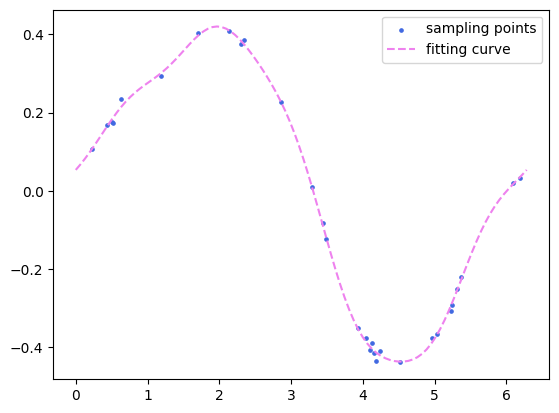

In [5]:
plt.scatter(sampleTheta, sampleS, s=5.5, color="royalBlue", label="sampling points")
plt.plot(np.linspace(0,2*np.pi,100), getS(np.linspace(0,2*np.pi,100)), color="violet", ls="--", label="fitting curve")
plt.legend()

In [6]:
def getSampleR(theta: np.ndarray) -> np.ndarray:
    return np.sin(theta) + 0.4*np.sin(2*theta+1) - 0.2*np.sin(5*theta-2) + 0.05*np.random.rand(theta.size)

def getSampleZ(theta: np.ndarray) -> np.ndarray:
    return 0.7*np.cos(theta) + 0.3*np.cos(3*theta+1) + 0.2*np.sin(4*theta-2) + 0.05*np.random.rand(theta.size)

In [7]:
sampleNums = 75
sampleTheta = np.random.rand(sampleNums) *2*np.pi
sampleR = getSampleR(sampleTheta)
sampleZ = getSampleZ(sampleTheta)

In [8]:
rm, rSin, rCos = fitting.fitCurve(sampleTheta, sampleR, mpol=5, verbose=2)
zm, zSin, zCos = fitting.fitCurve(sampleTheta, sampleZ, mpol=5, verbose=2)

def getR(theta: np.ndarray) -> np.ndarray:
    angleMat = np.dot(rm.reshape(-1,1), theta.reshape(1,-1))
    return (
        np.dot(rSin.reshape(1,-1), np.sin(angleMat)) + 
        np.dot(rCos.reshape(1,-1), np.cos(angleMat))
    ).flatten()

def getZ(theta: np.ndarray) -> np.ndarray:
    angleMat = np.dot(zm.reshape(-1,1), theta.reshape(1,-1))
    return (
        np.dot(zSin.reshape(1,-1), np.sin(angleMat)) + 
        np.dot(zCos.reshape(1,-1), np.cos(angleMat))
    ).flatten()

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.2768e+01                                    3.75e+01    
       1              2         1.4576e-01      2.26e+01       1.00e+00       2.77e+00    
       2              5         1.4462e-02      1.31e-01       1.25e-01       5.14e-01    
       3              8         7.9334e-03      6.53e-03       1.56e-02       1.85e-01    
       4             10         6.7399e-03      1.19e-03       7.81e-03       4.91e-02    
       5             12         6.6296e-03      1.10e-04       3.91e-03       7.96e-03    
       6             15         6.6261e-03      3.47e-06       4.88e-04       1.35e-03    
       7             18         6.6260e-03      9.11e-08       6.10e-05       5.46e-04    
       8             20         6.6260e-03      1.71e-08       3.05e-05       1.57e-04    
       9             22         6.6260e-03      1.50e-09       1.53e-05       3.39e-05    

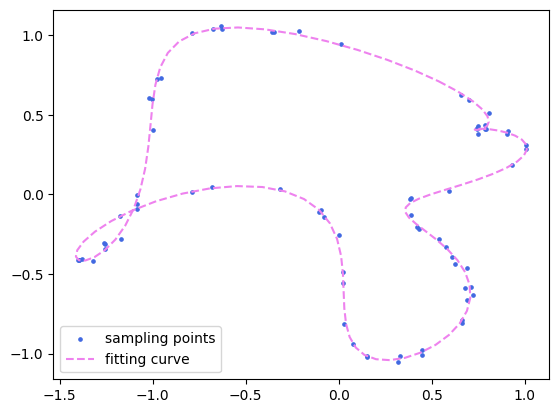

In [9]:
plt.scatter(sampleR, sampleZ, s=5.5, color="royalBlue", label="sampling points")
angle = np.linspace(0, 2*np.pi, 100)
plt.plot(getR(angle), getZ(angle), color="violet", ls="--", label="fitting curve")
plt.legend()